# Easy and Powerful Dates and Times in Pandas

To conclude this course, you'll apply everything you've learned about working with dates and times in standard Python to working with dates and times in Pandas. With additional information about each bike ride, such as what station it started and stopped at and whether or not the rider had a yearly membership, you'll be able to dig much more deeply into the bike trip data. In this chapter, you'll cover powerful Pandas operations, such as grouping and plotting results by time.

## Reading date and time data in Pandas

1. Reading date and time data in Pandas
In this chapter, you will use the Pandas library to work with dates and times. You should have encountered Pandas before, but now we will add datetimes to the mix.

2. A simple Pandas example
To start with, let's load data with Pandas. First, we import pandas, and as is customary we use the alias pd. Our data is in a csv file, so we load it with the read_csv() function. pd-dot-read_csv() has one required argument, the name of the file to load, which in this case is capital-onebike-dot-csv. We save the result to the variable rides. Let's print the first three rows to see what we've got.

3. A simple Pandas example
Note that the index, listed all the way to the left, starts with zero. Because the table is too wide, it wraps around. Each of these three rows has a start date, an end date, a start station, and end station, the bike number, and whether the ride was from someone who is a member or someone who walked up to the kiosk and bought a ride on the spot.

4. A simple Pandas example
We can also select a particular column by using the brackets, as here where we call rides['Start date']. And we can get a particular row with dot-iloc[], in this case row number 2. Because we didn't tell Pandas to treat the start date and end date columns as datetimes, they are simply strings or objects. We want them to be datetimes so we can work with them effectively, using the tools from the first three chapters of this course.

5. Loading datetimes with parse_dates
If we want Pandas to treat these columns as datetimes, we can make use of the argument parse_dates in read_csv(), and set it to be a list of column names, passed as strings. Now Pandas will read these columns and convert them for us to datetimes. Pandas will try and be intelligent and figure out the format of your datetime strings. In the rare case that this doesn't work, you can use the to_datetime() method that lets you specify the format manually. For more details, see the Pandas documentation.

6. Loading datetimes with parse_dates
Now when we again ask for the Start date for row 2, we get back a Pandas Timestamp, which for essentially all purposes you can imagine is a Python Datetime object with a different name. They behave basically exactly the same.

7. Timezone-aware arithmetic
Since our Start date and End date columns are now datetimes, we can deal with them the way we usually deal with datetimes. For example, we can create a new column, Duration, by subtracting Start date from End date. Because each of these columns are datetimes, when we subtract them we get timedeltas. If we print out the first 5 rows, we get that the first ride lasted for only 3 minutes and 1 second, the second ride lasted for 2 hours and 7 minutes, the third ride lasted for 5 minutes 43 seconds, and so on.

8. Loading datetimes with parse_dates
Pandas has two features worth noting here. Let's see an example of converting our Duration to seconds, and looking at the first 5 rows. First, Pandas code is often written in a "method chaining" style, where we call a method, and then another, and then another. For readability, it's common to break them up with a backslash and a linebreak at the end of each. Second, you can access all of the typical datetime methods within the namespace -dot-dt. For example, we can convert our timedeltas into numbers with dot-dt-dot-total_seconds(). Now when we look at the results, we see that we've got seconds instead of timedeltas. Our first ride lasted 181 seconds, our second ride 7622 seconds, and so on.

9. Reading date and time data in Pandas
In this lesson, we discussed loading data in Pandas, and handling basic datetime elements. We talked about using slashes to continue lines, and selecting subsets of rows. Time to practice!

### Loading a csv file in Pandas

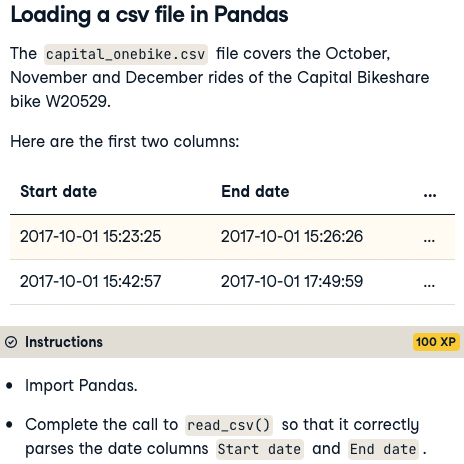

In [ ]:
# Import pandas
import ____ as pd

# Load CSV into the rides variable
rides = pd.read_csv('capital-onebike.csv', 
                    parse_dates = ____)

# Print the initial (0th) row
print(rides.iloc[0])

In [ ]:
# Import pandas
import pandas as pd

# Load CSV into the rides variable
rides = pd.read_csv('capital-onebike.csv', 
                    parse_dates = ['Start date', 'End date'])

# Print the initial (0th) row
print(rides.iloc[0])

In [ ]:
<script.py> output:
    Start date                        2017-10-01 15:23:25
    End date                          2017-10-01 15:26:26
    Start station number                            31038
    Start station                    Glebe Rd & 11th St N
    End station number                              31036
    End station             George Mason Dr & Wilson Blvd
    Bike number                                    W20529
    Member type                                    Member
    Name: 0, dtype: object

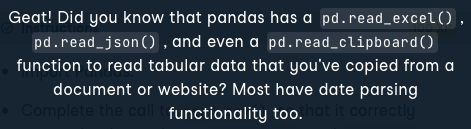

### Making timedelta columns

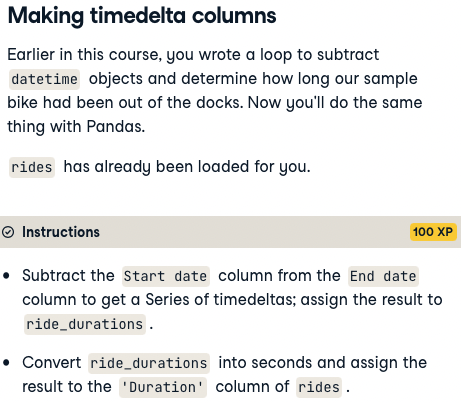

In [ ]:
In [1]:
rides.head()
Out[1]:

           Start date            End date  Start station number                         Start station  End station number                           End station Bike number Member type
0 2017-10-01 15:23:25 2017-10-01 15:26:26                 31038                  Glebe Rd & 11th St N               31036         George Mason Dr & Wilson Blvd      W20529      Member
1 2017-10-01 15:42:57 2017-10-01 17:49:59                 31036         George Mason Dr & Wilson Blvd               31036         George Mason Dr & Wilson Blvd      W20529      Casual
2 2017-10-02 06:37:10 2017-10-02 06:42:53                 31036         George Mason Dr & Wilson Blvd               31037  Ballston Metro / N Stuart & 9th St N      W20529      Member
3 2017-10-02 08:56:45 2017-10-02 09:18:03                 31037  Ballston Metro / N Stuart & 9th St N               31295                     Potomac & M St NW      W20529      Member
4 2017-10-02 18:23:48 2017-10-02 18:45:05                 31295                     Potomac & M St NW               31230         Metro Center / 12th & G St NW      W20529      Member

In [ ]:
# Subtract the start date from the end date
ride_durations = ____ - ____

# Convert the results to seconds
____[____] = ride_durations.____

print(rides['Duration'].head())

In [ ]:
# Subtract the start date from the end date
ride_durations = rides['End date'] - rides['Start date']

# Convert the results to seconds
rides['Duration'] = ride_durations.dt.total_seconds()

print(rides['Duration'].head())

In [ ]:
<script.py> output:
    0     181.0
    1    7622.0
    2     343.0
    3    1278.0
    4    1277.0
    Name: Duration, dtype: float64

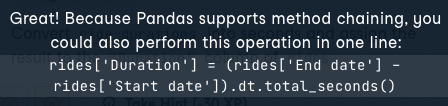

## Summarizing datetime data in Pandas

1. Summarizing datetime data in Pandas
In this lesson, we will discuss how to summarize Pandas tables, especially when we have datetime columns. One note: Pandas continues to evolve quickly. Many of the techniques in this chapter don't work on versions of Pandas more than a few years old. If anything breaks on your personal computer, make sure you're using at least Pandas version 0-point-23.

2. Summarizing data in Pandas
First things first, let's review some general principles for summarizing data in Pandas. You can call dot-mean(), dot-median(), dot-sum() and so on, on any column where it makes sense. For example, rides['Duration']-dot-mean() returns that the average time the bike was out of the dock was 19 minutes and 38 seconds. We also can ask: how much is this column in total? By using the dot-sum() method, we can see that the bike was out of the dock for a total of 3 days, 22 hours, 58 minutes and 10 seconds during this time period.

3. Summarizing data in Pandas
The output of Pandas operations mix perfectly well with the rest of Python. For example, if we divide this sum by 91 days (the number of days from October 1 to December 31), we see that the bike was out about 4.3% of the time, meaning about 96% of the time the bike was in the dock.

4. Summarizing data in Pandas
For non-numeric columns, we have other ways of making summaries. The dot-value_counts() method tells us how many times a given value appears. In this case, we want to know how often the Member type is Member or Casual. 236 rides were from Members, and 54 were from Casual riders, who bought a ride at the bike kiosk without a membership. We can also divide by the total number of rides, using len(rides), and Pandas handles the division for us across our result. 81-point-4% of rides were from members, whereas 18-point-6% of rides were from casual riders.

5. Summarizing datetime in Pandas
To make this next section easy, let's make a column called 'Duration seconds', which will be the original column 'Duration' converted to seconds. Pandas has powerful ways to group rows together. First, we can group by values in any column, using the dot-groupby() method. dot-groupby() takes a column name and does all subsequent operations on each group. For example, we can groupby Member type, and ask for the mean duration in seconds for each member type. Rides from casual members last nearly twice as long on average.

6. Summarizing datetime in Pandas
Second, we can also group by time, using the dot-resample() method. dot-resample() takes a unit of time (for example, 'M' for month), and a datetime column to group on, in this case 'Start date'. From this we can see that, in the month ending on October 31st, average rides were 1886 seconds, or about 30 minutes, whereas for the month ending December 31, average rides were 635 seconds, or closer to ten minutes.

7. Summarizing datetime in Pandas
There are also others methods which operate on groups. For example, we can call dot-size() to get the size of each group. Or we can call dot-first() to get the first row of each group.

8. Summarizing datetime in Pandas
Pandas also makes it easy to plot results. Just add the dot-plot() method at the end of your call and it will pass the results to the Python plotting library Matplotlib. It will usually have sensible defaults, though if you want to change things further you can.

9. Summarizing datetime in Pandas
We can also change the resampling rate from 'M' for months to 'D' for days, and plot again. Now we can see that there is at least one big outlier skewing our data: some ride in the middle of October was 25000 seconds long, or nearly 7 hours. We identified this ride in an earlier chapter as possibly a bike repair. Now we can see that it happened after many days with zero rides, which lends strength to that idea. If the bike was broken and sitting in the dock for awhile, eventually it would have been removed for repairs, then returned.

10. Summarizing datetime data in Pandas
In this lesson, we discussed how to use basic Pandas operations, such as dot-mean(), dot-median() and dot-sum(), and also dot-groupby() and dot-resample() to combine our rows into different groups. Time to practice what you've learned!

### How many joyrides?

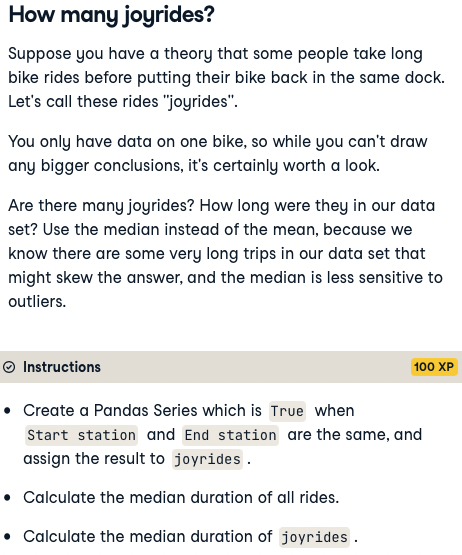

In [ ]:
In [1]:
rides.head()
Out[1]:

           Start date            End date  Start station number                         Start station  End station number                           End station Bike number Member type  Duration
0 2017-10-01 15:23:25 2017-10-01 15:26:26                 31038                  Glebe Rd & 11th St N               31036         George Mason Dr & Wilson Blvd      W20529      Member     181.0
1 2017-10-01 15:42:57 2017-10-01 17:49:59                 31036         George Mason Dr & Wilson Blvd               31036         George Mason Dr & Wilson Blvd      W20529      Casual    7622.0
2 2017-10-02 06:37:10 2017-10-02 06:42:53                 31036         George Mason Dr & Wilson Blvd               31037  Ballston Metro / N Stuart & 9th St N      W20529      Member     343.0
3 2017-10-02 08:56:45 2017-10-02 09:18:03                 31037  Ballston Metro / N Stuart & 9th St N               31295                     Potomac & M St NW      W20529      Member    1278.0
4 2017-10-02 18:23:48 2017-10-02 18:45:05                 31295                     Potomac & M St NW               31230         Metro Center / 12th & G St NW      W20529      Member    1277.0

In [ ]:
# Create joyrides
joyrides = (rides[____] == rides[____])

# Total number of joyrides
print("{} rides were joyrides".format(joyrides.sum()))

# Median of all rides
print("The median duration overall was {:.2f} seconds"\
      .format(rides['Duration'].____()))

# Median of joyrides
print("The median duration for joyrides was {:.2f} seconds"\
      .format(rides[____]['Duration'].____()))

In [ ]:
# Create joyrides
joyrides = (rides['Start station'] == rides['End station'])

# Total number of joyrides
print("{} rides were joyrides".format(joyrides.sum()))

# Median of all rides
print("The median duration overall was {:.2f} seconds"\
      .format(rides['Duration'].median()))

# Median of joyrides
print("The median duration for joyrides was {:.2f} seconds"\
      .format(rides[joyrides]['Duration'].median()))

In [ ]:
<script.py> output:
    6 rides were joyrides
    The median duration overall was 660.00 seconds
    The median duration for joyrides was 2642.50 seconds

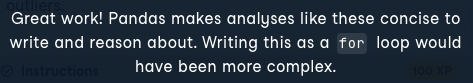

### It's getting cold outside, W20529

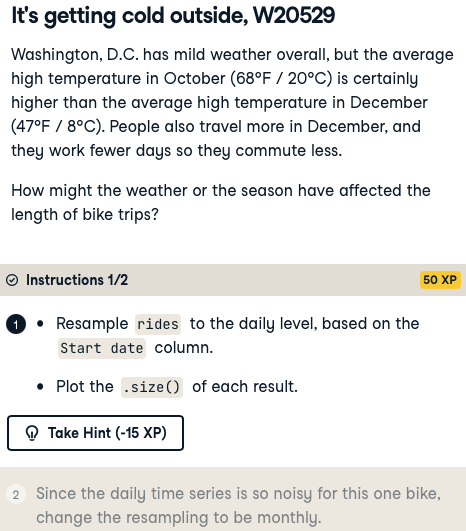

In [ ]:
In [1]:
rides.head()
Out[1]:

           Start date            End date  Start station number                         Start station  End station number                           End station Bike number Member type  Duration
0 2017-10-01 15:23:25 2017-10-01 15:26:26                 31038                  Glebe Rd & 11th St N               31036         George Mason Dr & Wilson Blvd      W20529      Member     181.0
1 2017-10-01 15:42:57 2017-10-01 17:49:59                 31036         George Mason Dr & Wilson Blvd               31036         George Mason Dr & Wilson Blvd      W20529      Casual    7622.0
2 2017-10-02 06:37:10 2017-10-02 06:42:53                 31036         George Mason Dr & Wilson Blvd               31037  Ballston Metro / N Stuart & 9th St N      W20529      Member     343.0
3 2017-10-02 08:56:45 2017-10-02 09:18:03                 31037  Ballston Metro / N Stuart & 9th St N               31295                     Potomac & M St NW      W20529      Member    1278.0
4 2017-10-02 18:23:48 2017-10-02 18:45:05                 31295                     Potomac & M St NW               31230         Metro Center / 12th & G St NW      W20529      Member    1277.0

In [ ]:
# Import matplotlib
import matplotlib.pyplot as plt

# Resample rides to daily, take the size, plot the results
rides.resample(____, ____ = 'Start date')\
  .____\
  .plot(ylim = [0, 15])

# Show the results
plt.show()

In [ ]:
# Import matplotlib
import matplotlib.pyplot as plt

# Resample rides to daily, take the size, plot the results
rides.resample('D', on = 'Start date')\
  .size()\
  .plot(ylim = [0, 15])

# Show the results
plt.show()

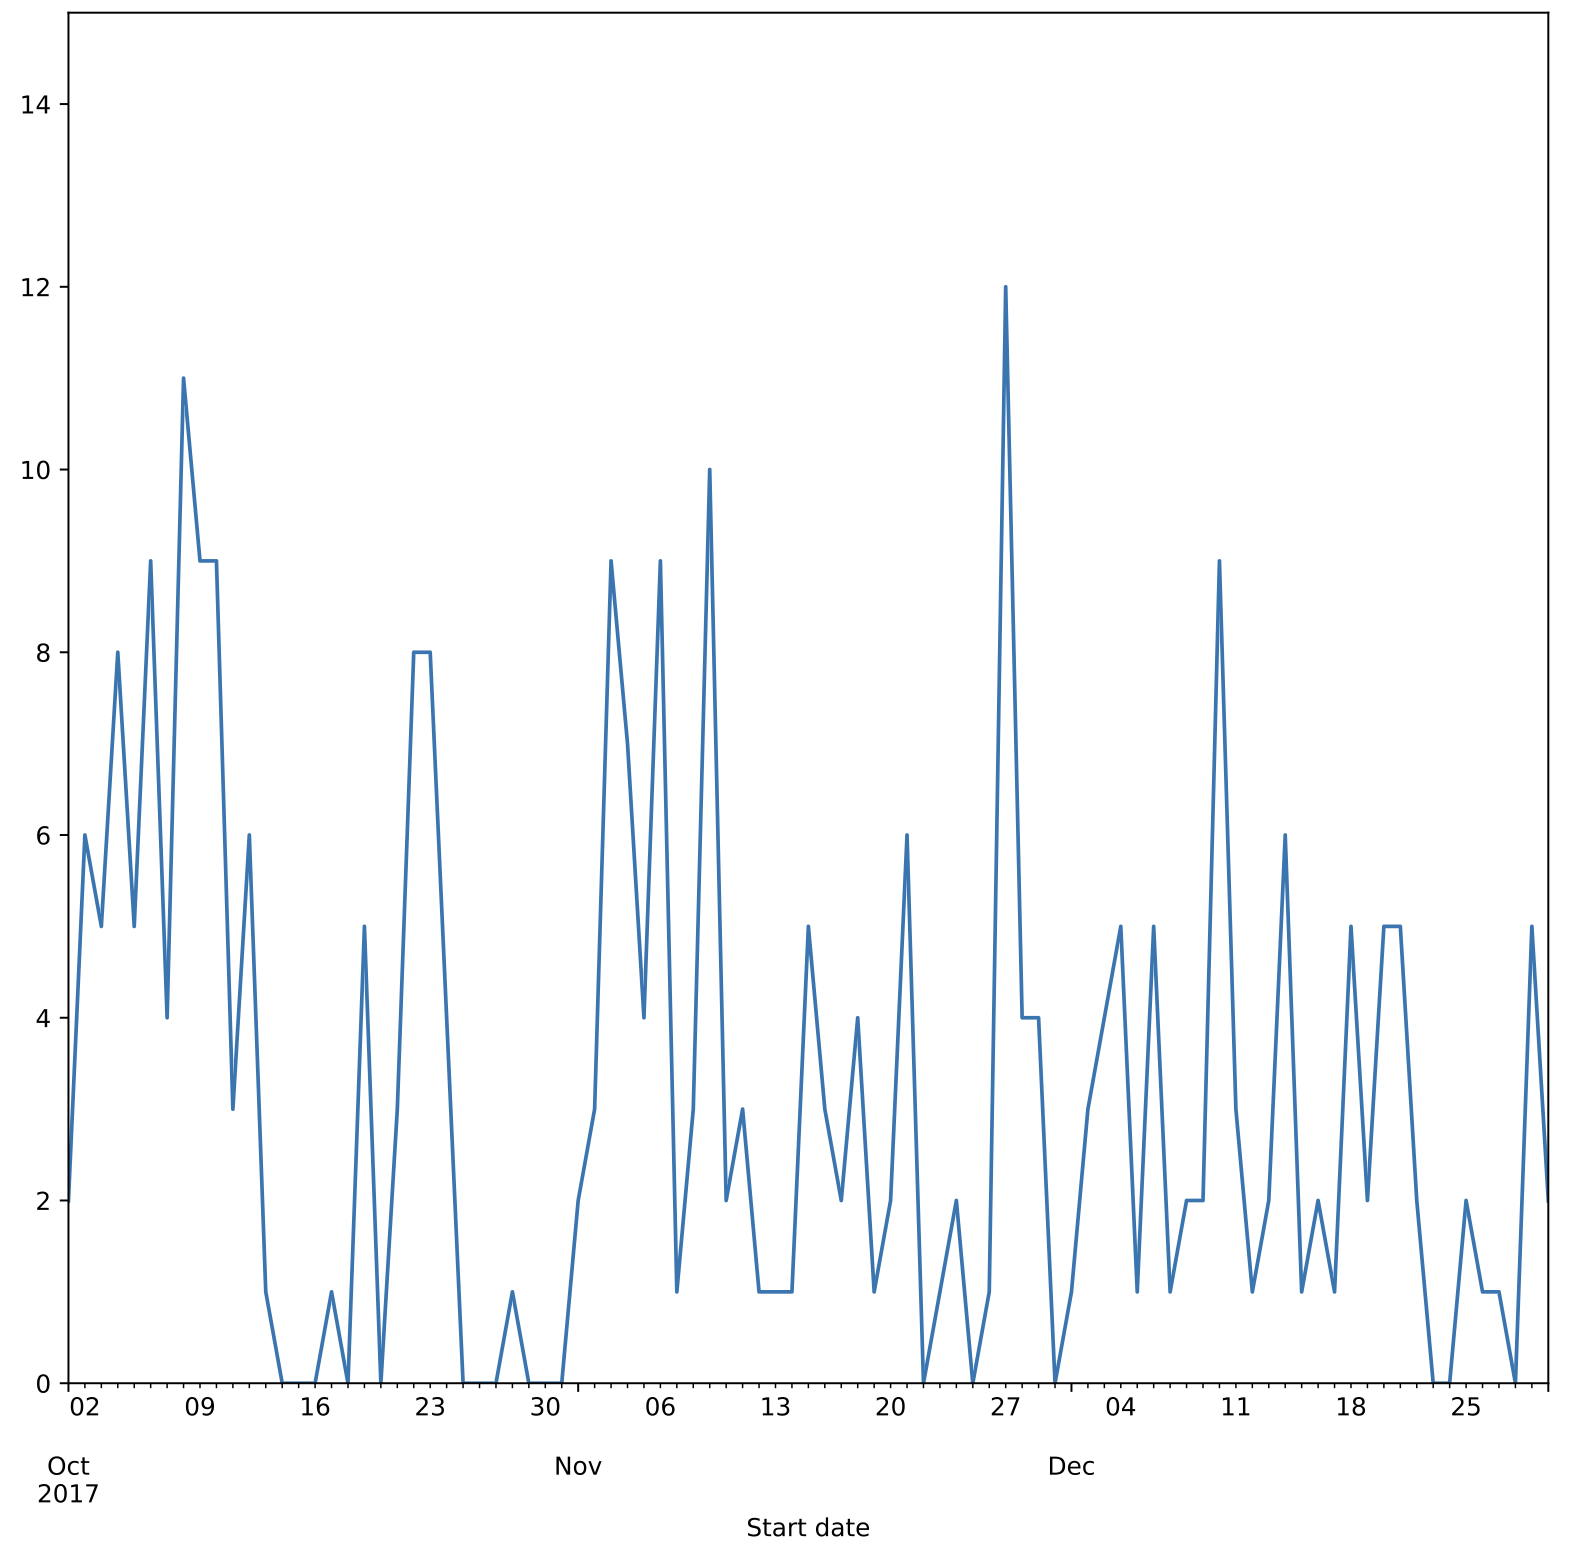

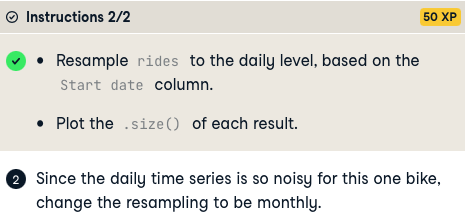

In [ ]:
# Import matplotlib
import matplotlib.pyplot as plt

# Resample rides to monthly, take the size, plot the results
rides.____(____, on = 'Start date')\
  .size()\
  .plot(ylim = [0, 150])

# Show the results
plt.show()

In [ ]:
# Import matplotlib
import matplotlib.pyplot as plt

# Resample rides to monthly, take the size, plot the results
rides.resample('M', on = 'Start date')\
  .size()\
  .plot(ylim = [0, 150])

# Show the results
plt.show()

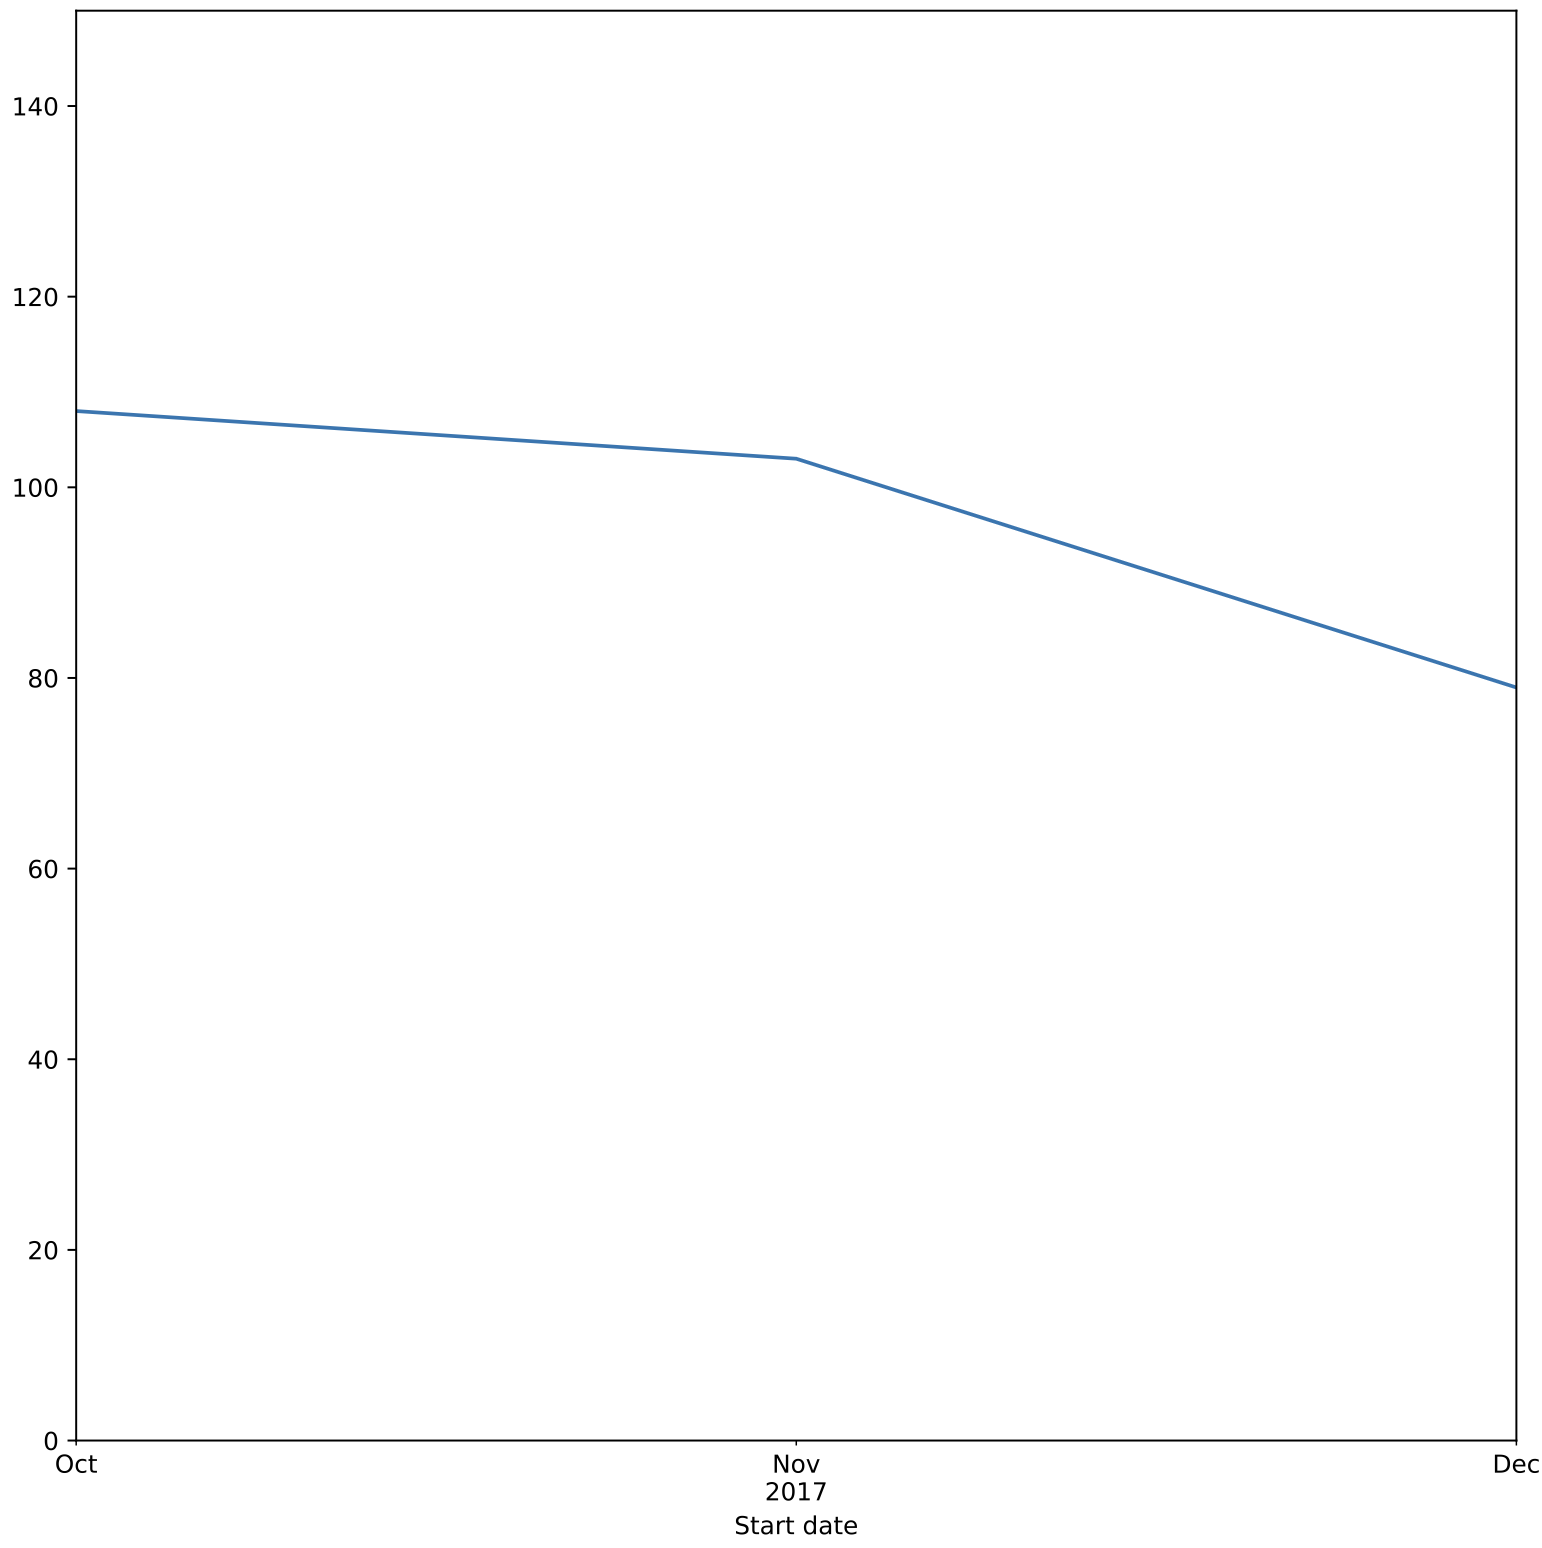
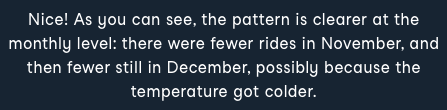

### Members vs casual riders over time

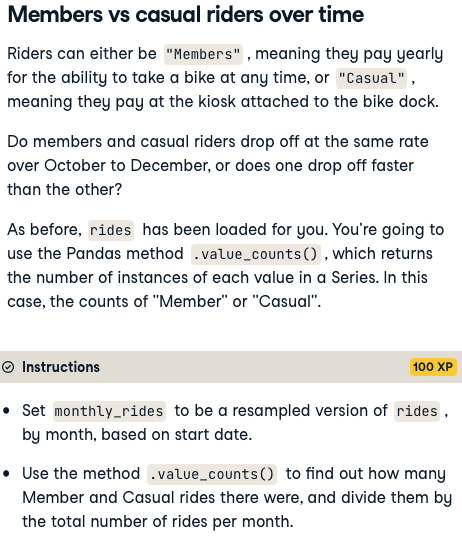

In [ ]:
In [1]:
rides.head()
Out[1]:

           Start date            End date  Start station number                         Start station  End station number                           End station Bike number Member type  Duration
0 2017-10-01 15:23:25 2017-10-01 15:26:26                 31038                  Glebe Rd & 11th St N               31036         George Mason Dr & Wilson Blvd      W20529      Member     181.0
1 2017-10-01 15:42:57 2017-10-01 17:49:59                 31036         George Mason Dr & Wilson Blvd               31036         George Mason Dr & Wilson Blvd      W20529      Casual    7622.0
2 2017-10-02 06:37:10 2017-10-02 06:42:53                 31036         George Mason Dr & Wilson Blvd               31037  Ballston Metro / N Stuart & 9th St N      W20529      Member     343.0
3 2017-10-02 08:56:45 2017-10-02 09:18:03                 31037  Ballston Metro / N Stuart & 9th St N               31295                     Potomac & M St NW      W20529      Member    1278.0
4 2017-10-02 18:23:48 2017-10-02 18:45:05                 31295                     Potomac & M St NW               31230         Metro Center / 12th & G St NW      W20529      Member    1277.0

In [ ]:
# Resample rides to be monthly on the basis of Start date
monthly_rides = rides.____(____)['Member type']

# Take the ratio of the .value_counts() over the total number of rides
print(monthly_rides.____() / monthly_rides.size())

In [ ]:
# Resample rides to be monthly on the basis of Start date
monthly_rides = rides.resample('M', on = 'Start date')['Member type']

# Take the ratio of the .value_counts() over the total number of rides
print(monthly_rides.value_counts() / monthly_rides.size())

In [ ]:
<script.py> output:
    Start date  Member type
    2017-10-31  Member         0.769
                Casual         0.231
    2017-11-30  Member         0.825
                Casual         0.175
    2017-12-31  Member         0.861
                Casual         0.139
    Name: Member type, dtype: float64

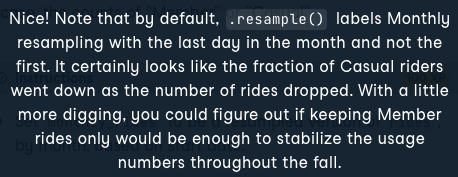

### Combining groupby() and resample()

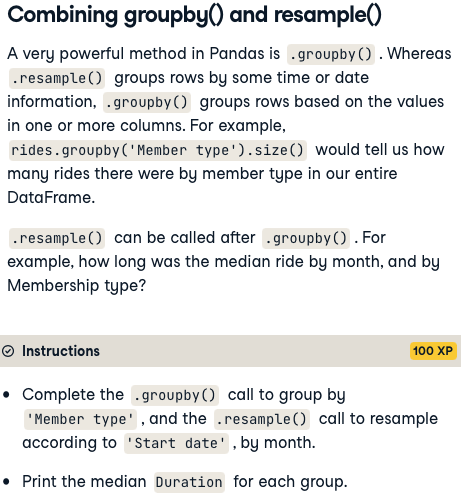

In [ ]:
# Group rides by member type, and resample to the month
grouped = rides.groupby('____')\
  .resample(____, ____)

# Print the median duration for each group
print(grouped[____].____)

In [ ]:
# Group rides by member type, and resample to the month
grouped = rides.groupby('Member type')\
  .resample('M', on = 'Start date')

# Print the median duration for each group
print(grouped['Duration'].median())

In [ ]:
<script.py> output:
    Member type  Start date
    Casual       2017-10-31    1636.0
                 2017-11-30    1159.5
                 2017-12-31     850.0
    Member       2017-10-31     671.0
                 2017-11-30     655.0
                 2017-12-31     387.5
    Name: Duration, dtype: float64

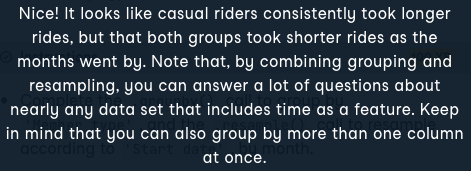

## Additional datetime methods in Pandas

1. Additional datetime methods in Pandas
In this final lesson, we will cover some additional Pandas methods for working with dates and times. By the end of this lesson, you will understand how to handle timezones in Pandas, as well as other common datetime operations.

2. Timezones in Pandas
First, a reminder of the importance of timezones. If we ask Pandas to tell us the smallest ride duration in seconds, using the dt-dot-total_seconds() method and then the dot-min() method, we get -3346 seconds, or -55 minutes. Yikes! Something is wrong, since our ride durations shouldn't ever be negative.

3. Timezones in Pandas
The answer, as it was when we looked at this data set in standard Python, is Daylight Saving. Just like with standard Python, these datetime objects start off as timezone-naive. They're not tied to any absolute time with a UTC offset. Let's see the first three Start dates so we can see how they're displayed and check that there is no UTC offset. To start, we want those same three datetimes to be put into a timezone. The method for this in Pandas is dt-dot-tz_localize(). Now when we look at the localized datetimes, we can see that they have a UTC offset.

4. Timezones in Pandas
However, if we try to convert our entire Start date column to the America/New_York timezone, Pandas will throw an AmbiguousTimeError. As expected, we have one datetime that occurs during the Daylight Saving shift. Following the advice of the error message, we can set the ambiguous argument in the dt-dot-tz_localize() method. By default, it raises an error, as we saw before. We also can pass the string 'NaT', which says that if the converter gets confused, it should set the bad result as Not a Time. Pandas is smart enough to skip over NaTs when it sees them, so our dot-min() and other methods will just ignore this one row.

5. Timezones in Pandas
Now that we've fixed the timezones, we should recalculate our durations, in case any rides had been across Daylight Saving boundaries. This time, when we take Durations, convert it to seconds, and take the minimum, we get a much more sensible 116-point-0 seconds, or about two minutes.

6. Timezones in Pandas
Just to know what we're looking at, let's pull up our problematic row. Here, both the start and end time were ambiguous, so they've been set to NaT. As a result, our Duration, since it's the difference of two undefined times, is also NaT.

7. Other datetime operations in Pandas
There are other datetime operations you should know about too. The simplest are ones you're already familiar with: .year, .month, and so on. In Pandas, these are accessed with dt-dot-year, dt-dot-month, etc. For example, here is the year of the first three rows. There are other useful things that Pandas gives you, some of which are not available in standard Python. For example, the method dt-dot-day_name() gives you the day of the week for each element in a datetime Series. You can even specify if you want weekday names in a language other than English. These results can be aggregated with dot-groupby() call, to summarize data by year, month, day of the week, and so on.

8. Other parts of Pandas
Pandas also lets you shift rows up or down with the dot-shift() method. Here we've shifted the rides one row forward so that our zeroth row is now NaT, and our first row has the same value that our zeroth row had before. This is useful if you want to, for example, line up the end times of each row with the start time of the next one. Now you can answer questions about how each ride compares to the previous one! You'll cover this in an exercise shortly.

9. Additional datetime methods in Pandas
In this lesson, we looked at additional methods in Pandas that are relevant to working with datetimes. Hopefully, this gave you a good taste of all the things Pandas is capable of! Time to try them out in the exercises.

### Timezones in Pandas

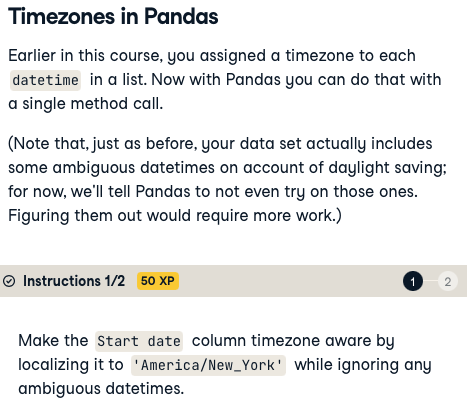

In [ ]:
# Localize the Start date column to America/New_York
rides['Start date'] = rides['Start date'].____

# Print first value
print(rides['Start date'].iloc[0])

In [ ]:
# Localize the Start date column to America/New_York
rides['Start date'] = rides['Start date'].dt.tz_localize('America/New_York', ambiguous = 'NaT')

# Print first value
print(rides['Start date'].iloc[0])

In [ ]:
<script.py> output:
    2017-10-01 15:23:25-04:00

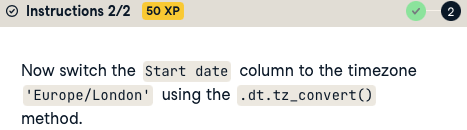

In [ ]:
# Localize the Start date column to America/New_York
rides['Start date'] = rides['Start date'].dt.tz_localize('America/New_York', 
                                						 ambiguous='NaT')

# Print first value
print(rides['Start date'].iloc[0])

# Convert the Start date column to Europe/London
rides['Start date'] = rides['Start date'].____

# Print the new value
print(rides['Start date'].iloc[0])

In [ ]:
# Localize the Start date column to America/New_York
rides['Start date'] = rides['Start date'].dt.tz_localize('America/New_York', 
                                						 ambiguous='NaT')

# Print first value
print(rides['Start date'].iloc[0])

# Convert the Start date column to Europe/London
rides['Start date'] = rides['Start date'].dt.tz_convert('Europe/London')

# Print the new value
print(rides['Start date'].iloc[0])

In [ ]:
<script.py> output:
    2017-10-01 15:23:25-04:00
    2017-10-01 20:23:25+01:00

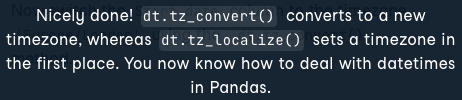

### How long per weekday?

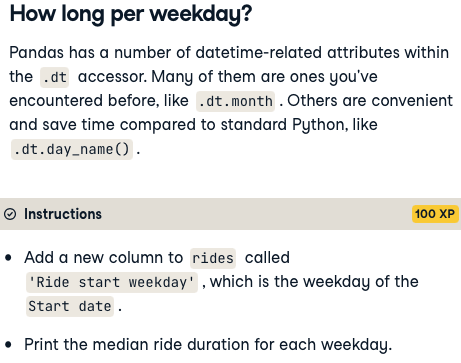

In [ ]:
# Add a column for the weekday of the start of the ride
rides['Ride start weekday'] = rides['Start date'].____

# Print the median trip time per weekday
print(rides.____(____)['Duration'].median())

In [ ]:
# Add a column for the weekday of the start of the ride
rides['Ride start weekday'] = rides['Start date'].dt.day_name()

# Print the median trip time per weekday
print(rides.groupby('Ride start weekday')['Duration'].median())

In [ ]:
<script.py> output:
    Ride start weekday
    Friday       724.5
    Monday       810.5
    Saturday     462.0
    Sunday       902.5
    Thursday     652.0
    Tuesday      641.5
    Wednesday    585.0
    Name: Duration, dtype: float64

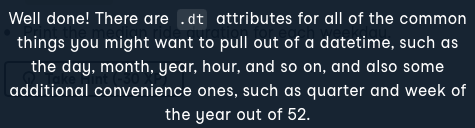

### How long between rides?

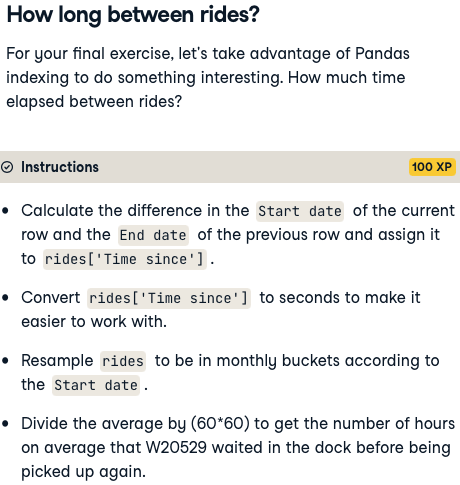

In [ ]:
# Shift the index of the end date up one; now subract it from the start date
rides['Time since'] = rides['Start date'] - (rides[____].shift(1))

# Move from a timedelta to a number of seconds, which is easier to work with
rides['Time since'] = rides['Time since'].____

# Resample to the month
monthly = rides.____

# Print the average hours between rides each month
print(monthly['Time since'].____/(60*60))

In [ ]:
# Shift the index of the end date up one; now subract it from the start date
rides['Time since'] = rides['Start date'] - (rides['End date'].shift(1))

# Move from a timedelta to a number of seconds, which is easier to work with
rides['Time since'] = rides['Time since'].dt.total_seconds()

# Resample to the month
monthly = rides.resample('M', on = 'Start date')

# Print the average hours between rides each month
print(monthly['Time since'].mean()/(60*60))

In [ ]:
<script.py> output:
    Start date
    2017-10-31    5.519
    2017-11-30    7.256
    2017-12-31    9.202
    Freq: M, Name: Time since, dtype: float64

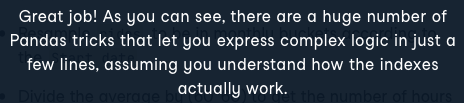

## Wrap-up

1. Wrap-up
In this course, you learned many things about working with dates and times in Python. Let's recap what we've covered.

2. Recap: Dates and Calendars
In the first chapter of this course, we covered dates in Python. The date() class takes a year, month, and day as arguments. A date object has accessors like year, and also methods like weekday(). date objects can be compared like numbers, using min(), max(), and sort(). You can subtract one date from another to get a timedelta. To turn date objects into strings, use the isoformat() or strftime() methods.

3. Recap: Combining Dates and Times
In the second chapter of this course, we covered datetimes. The datetime() class takes all the arguments of date(), plus an hour, minute, second, and microsecond. All of the additional arguments are optional; otherwise, they're set to zero by default. You can replace any value in a datetime with the replace() method. Convert a timedelta into an integer with its total_seconds() method. Turn strings into dates with strptime() and dates into strings with strftime().

4. Recap: Timezones and Daylight Saving
In the third chapter of this course, we covered timezones and daylight saving. A datetime is "timezone aware" when it has its tzinfo set. Otherwise it is "timezone naive". Setting a timezone tells a datetime how to align itself to UTC, the universal time standard. Use the replace() method to change the timezone of a datetime, leaving the date and time the same. Use the astimezone() method to shift the date and time to match the new timezone. dateutil-dot-tz provides a comprehensive, updated timezone database.

5. Recap: Easy and Powerful Timestamps in Pandas
In the fourth and final chapter of this course, we covered using Pandas for handling dates and times. When reading a csv, set the parse_dates argument to be the list of columns which should be parsed as datetimes. If setting parse_dates doesn't work, use the pd-dot-to_datetime() function. Grouping rows with groupby() lets you calculate aggregates per group. For example, first(), min() or mean(). resample() groups rows on the basis of a datetime column, by year, month, day, and so on. Use tz_localize() to set a timezone, keeping the date and time the same. Use tz_convert() to change the date and time to match a new timezone.

6. Congratulations!
At this point, you have all of the knowledge you need to effectively use dates and times in Python. Even better, you've had a chance to practice! If you want to get really good with dates, why not get some more practice? Google for "interesting data sets", find one you like that has dates in it, pull it down, and get going!